# Install Monk
  
 - git clone https://github.com/Tessellate-Imaging/monk_v1.git
 
 - cd monk_v1/installation && pip install -r requirements_cu9.txt
     - (Select the requirements file as per OS and CUDA version)

In [ ]:
!git clone https://github.com/Tessellate-Imaging/monk_v1.git

In [1]:
# Monk
import os
import sys
sys.path.append("monk_v1/monk/");

In [2]:
#For pytorch use pytorch_prototype
#For keras use keras_prototype
from gluon_prototype import prototype

In [4]:
#Create an experiment
gtf = prototype(verbose=1);
gtf.Prototype("sample-project", "sample-experiment-1");

Mxnet Version: 1.5.1

Experiment Details
    Project: sample-project
    Experiment: sample-experiment-1
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/blocks/workspace/sample-project/sample-experiment-1/



In [5]:
# Load dataset
gtf.Dataset_Params(dataset_path="monk_v1/monk/system_check_tests/datasets/dataset_cats_dogs_train",
                   split=0.9, input_size=(128, 128), batch_size=2, shuffle_data=True, 
                   num_processors=3);

# Transform
gtf.apply_random_horizontal_flip(train=True, val=True);

# Set Dataset
gtf.Dataset();



Dataset Details
    Train path:     monk_v1/monk/system_check_tests/datasets/dataset_cats_dogs_train
    Val path:       None
    CSV train path: None
    CSV val path:   None

Dataset Params
    Input Size:   (128, 128)
    Batch Size:   2
    Data Shuffle: True
    Processors:   3
    Train-val split:   0.9

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.5}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.5}}]

Dataset Numbers
    Num train images: 180
    Num val images:   20
    Num classes:      2



In [6]:
# List all blocks available
gtf.List_Blocks();

Blocks List: 
    1. resnet_v1_block
    2. resnet_v2_block
    3. resnet_v1_bottleneck_block
    4. resnet_v2_bottleneck_block
    5. resnext_block
    6. mobilenet_v2_linear_block
    7. mobilenet_v2_inverted_linear_block
    8. squeezenet_fire_block
    9. conv_bn_relu_block
    10. inception_a_block
    11. inception_b_block
    12. inception_c_block
    13. inception_d_block
    14. inception_e_block



In [9]:
network = [];

network.append(gtf.squeezenet_fire_block(squeeze_channels=32, 
                                         expand_channels_1x1=32, 
                                         expand_channels_3x3=64));


network.append(gtf.densenet_block(bottleneck_size=4, growth_rate=64, dropout=0.2));


network.append(gtf.resnet_v1_block(output_channels=64, stride=1, downsample=True));


network.append(gtf.average_pooling(kernel_size=2));

network.append(gtf.resnet_v2_block(output_channels=256, stride=1, downsample=True));

network.append(gtf.resnet_v2_bottleneck_block(output_channels=256, stride=1, downsample=False));

network.append(gtf.average_pooling(kernel_size=2));

network.append(gtf.resnext_block(output_channels=256, 
                                 cardinality=8, bottleneck_width=4, 
                                 stride=1, downsample=True));


network.append(gtf.mobilenet_v2_inverted_linear_bottleneck_block(output_channels=256, 
                                                                    bottleneck_width=8, 
                                                                    stride=1));



network.append(gtf.average_pooling(kernel_size=2));
network.append(gtf.flatten());
network.append(gtf.dropout(drop_probability=0.2));
network.append(gtf.fully_connected(units=1024));
network.append(gtf.dropout(drop_probability=0.2));
network.append(gtf.fully_connected(units=2));

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           Custom Model
        Num of potentially trainable layers:  41
        Num of actual trainable layers:       41



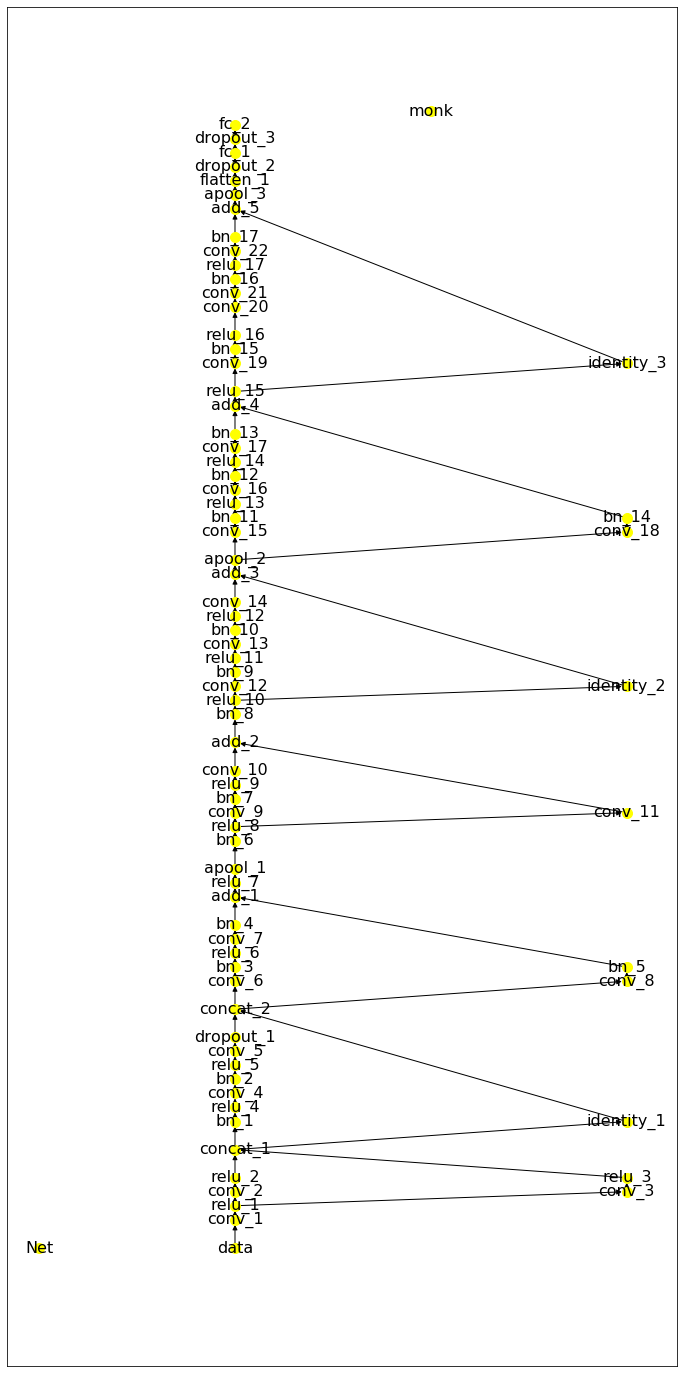

In [10]:
#Compile Network
gtf.Compile_Network(network, data_shape=(3, 128, 128));

In [11]:
#Visualize Network
gtf.Visualize_With_Netron(data_shape=(3, 128, 128))

Using Netron To Visualize
Not compatible on kaggle
Compatible only for Jupyter Notebooks
Serving 'model-symbol.json' at http://localhost:8080


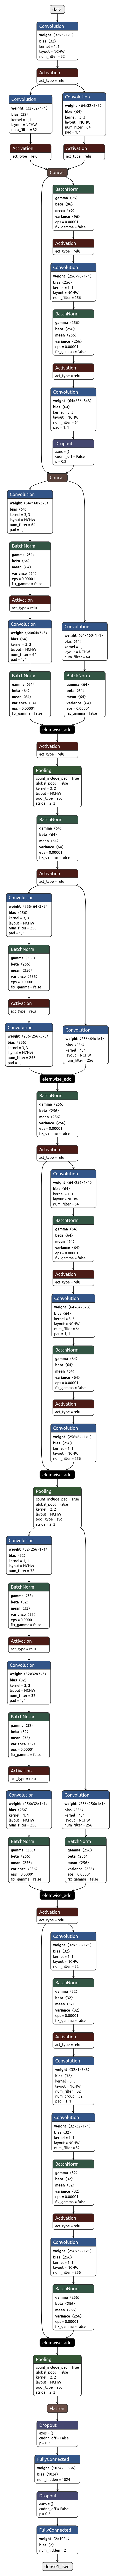

In [12]:
from IPython.display import Image
Image(filename='imgs/final_network.png')

In [13]:
#Set training hyper params
gtf.Training_Params(num_epochs=10, display_progress=True, display_progress_realtime=True, 
        save_intermediate_models=True, intermediate_model_prefix="intermediate_model_", save_training_logs=True);


gtf.optimizer_sgd(0.0001);

gtf.lr_fixed();

gtf.loss_softmax_crossentropy();

Training params
    Num Epochs: 10

Display params
    Display progress:          True
    Display progress realtime: True
    Save Training logs:        True
    Save Intermediate models:  True
    Intermediate model prefix: intermediate_model_

Optimizer
    Name:          sgd
    Learning rate: 0.0001
    Params:        {'lr': 0.0001, 'momentum': 0, 'weight_decay': 0, 'momentum_dampening_rate': 0, 'clipnorm': 0.0, 'clipvalue': 0.0}



Learning rate scheduler
    Name:   fixed
    Params: {}

Loss
    Name:          softmaxcrossentropy
    Params:        {'weight': None, 'batch_axis': 0, 'axis_to_sum_over': -1, 'label_as_categories': True, 'label_smoothing': False}



monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


In [14]:
# Train
gtf.Train();

Training Start
    Epoch 1/10
    ----------




    curr_lr - 0.0001
    [Epoch 1] Train-acc: 0.561, Train-loss: 5.665 | Val-acc: 0.500000, Val-loss: 8.488, | time: 7.3 sec

    Epoch 2/10
    ----------




    curr_lr - 0.0001
    [Epoch 2] Train-acc: 0.617, Train-loss: 5.761 | Val-acc: 0.350000, Val-loss: 10.062, | time: 7.1 sec

    Epoch 3/10
    ----------




    curr_lr - 0.0001
    [Epoch 3] Train-acc: 0.617, Train-loss: 5.207 | Val-acc: 0.450000, Val-loss: 8.619, | time: 6.9 sec

    Epoch 4/10
    ----------




    curr_lr - 0.0001
    [Epoch 4] Train-acc: 0.711, Train-loss: 3.600 | Val-acc: 0.550000, Val-loss: 7.524, | time: 8.1 sec

    Epoch 5/10
    ----------




    curr_lr - 0.0001
    [Epoch 5] Train-acc: 0.650, Train-loss: 4.030 | Val-acc: 0.500000, Val-loss: 4.663, | time: 8.6 sec

    Epoch 6/10
    ----------




    curr_lr - 0.0001
    [Epoch 6] Train-acc: 0.789, Train-loss: 1.915 | Val-acc: 0.300000, Val-loss: 8.498, | time: 10.0 sec

    Epoch 7/10
    ----------




    curr_lr - 0.0001
    [Epoch 7] Train-acc: 0.822, Train-loss: 1.549 | Val-acc: 0.500000, Val-loss: 6.647, | time: 6.5 sec

    Epoch 8/10
    ----------




    curr_lr - 0.0001
    [Epoch 8] Train-acc: 0.789, Train-loss: 2.445 | Val-acc: 0.500000, Val-loss: 5.568, | time: 7.4 sec

    Epoch 9/10
    ----------




    curr_lr - 0.0001
    [Epoch 9] Train-acc: 0.850, Train-loss: 1.184 | Val-acc: 0.500000, Val-loss: 11.187, | time: 7.7 sec

    Epoch 10/10
    ----------




    curr_lr - 0.0001
    [Epoch 10] Train-acc: 0.817, Train-loss: 1.521 | Val-acc: 0.550000, Val-loss: 6.612, | time: 6.4 sec

    Training completed in: 0m 51s
    Best val Acc:          0.550000

Training End

Training Outputs
    Model Dir:   /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/blocks/workspace/sample-project/sample-experiment-1/output/models/
    Log Dir:     /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/blocks/workspace/sample-project/sample-experiment-1/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc_history.npy
    Log 4 - Training loss history log:       train_loss_history.npy
    Log 5 - Training curve:                  train_loss_history.np

<Figure size 432x288 with 0 Axes>

In [15]:
# Switch mode for evaluation

gtf.Switch_Mode(eval_infer=True)

In [16]:
# Evaluate accuracies on validation dataset

gtf.Dataset_Params(dataset_path="monk_v1/monk/system_check_tests/datasets/dataset_cats_dogs_eval");
gtf.Dataset();
accuracy, class_based_accuracy = gtf.Evaluate();

Dataset Details
    Test path:      monk_v1/monk/system_check_tests/datasets/dataset_cats_dogs_eval
    CSV test path:  None

Dataset Params
    Input Size:  (128, 128)
    Processors:   3

Pre-Composed Test Transforms
[]

Dataset Numbers
    Num test images: 50
    Num classes:      2

Testing



    Result
        class based accuracies
            0. cat - 76.0 %
            1. dog - 80.0 %
        total images:            50
        num correct predictions: 39
        Average accuracy (%):    78.0

